# Prosper Loan Data Exploration

## By Emma Hungrige

## Investigation Overview

Key plots were chosen with high data-to-ink ratio for this presentation. The plots presented shows the distribution of the main variables - IncomeRange, EmploymentStatus, ProsperRating, and EstimatedReturns. These factors help to show some of the major predictors for LoanStatus and ProsperRating variables.


## Dataset Overview

This dataset contains information on peer to peer loans faciliated by the credit company Prosper. There are 113,937 loans with 81 variables. For the purpose of this investigation, the following variables are used:

1. **IncomeRange**
2. **DebtToIncomeRatio**
3. **CreditGrade**
4. **ProsperRating (Alpha)**
5. **EstimatedReturn**
6. **ActualReturn** 

In [7]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [8]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("ProsperLoanData.csv")

In [9]:
# Establishing color base for visualizations
base_color = sns.color_palette()[0]

In [10]:
#Replace NC with HR
df["CreditGrade"].replace(["NC", "HR"], "E", inplace = True)

#Fill NA with empty strings
df["ProsperRating (Alpha)"].fillna("", inplace = True)
df["CreditGrade"].fillna("", inplace = True)

#Combine credit ratings
df["ProsperRatingCombined"] = df["ProsperRating (Alpha)"] + df["CreditGrade"]

#Drop rows with no credit ratings
df = df.query(' ProsperRatingCombined != ""')

#Check values
df["ProsperRatingCombined"].value_counts()

C     23994
B     19970
D     19427
A     17866
E     16733
AA     8881
HR     6935
Name: ProsperRatingCombined, dtype: int64

In [11]:
#Convert string to ordinal category type
ordinal_rating = ["AA", "A", "B", "C", "D", "E"]
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_rating)
df["ProsperRatingCombined"] = df["ProsperRatingCombined"].astype(ordered_var)

In [12]:
#Simplified actual return formula
df["ActualReturns"] = df.LP_CustomerPayments - df.LoanOriginalAmount - (df.LP_ServiceFees + df.LP_CollectionFees + df.LP_NetPrincipalLoss)
df["ActualReturns"] = 1 + (df.ActualReturns / df.LoanOriginalAmount)

In [13]:
df["IncomeRange"].replace(["Not employed", "Not displayed"], "$0", inplace = True)

In [14]:
#Create ordinal categories for income
ordinal_rating = ["$100,000+", "$75,000-99,999", "$50,000-74,999", "$25,000-49,999", "$1-24,999", "$0"]
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_rating)
df["IncomeRange"] = df["IncomeRange"].astype(ordered_var)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Income Range

Let's look at a couple of the underwriting features for borrowers to be assigned the Prosper Credit Ratings. We'll start with taking a look at Income Ranges.

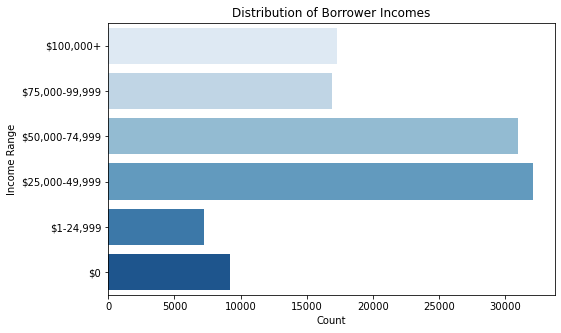

In [27]:
#Bar chart
plt.figure(figsize = [8, 5])
sns.countplot(data = df, y = "IncomeRange", palette = "Blues")
plt.ylabel("Income Range")
plt.xlabel("Count")
plt.title("Distribution of Borrower Incomes");

The number of borrowers for the 25k-49k range is the same as the 50k-74k range. The amount of borrowers in the 75k-100k range is the same as all borrowers that have an income of over 100k.

## Employment Status

Let's look at the Employment Status of borrowers now that we've looked into their income ranges.

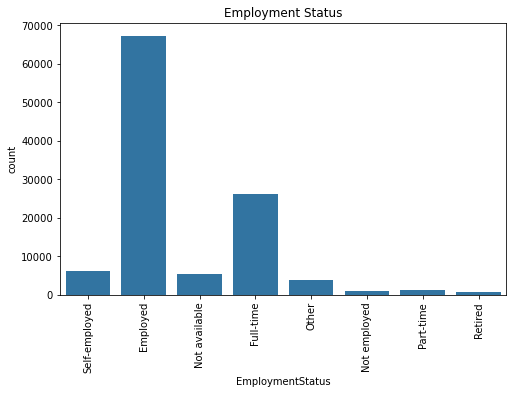

In [28]:
plt.figure(figsize = [8, 5])
sns.countplot(data = df, x = "EmploymentStatus", color = base_color).set(title="Employment Status")
plt.xticks(rotation = 90);

Not surprisingly, the largest category of borrowers are employed and the largest sub-category of the employed status is full-time.

## Income Range and Credit Rating vs Estimated Returns

Let's take a look at how a borrower's income range and credit rating relates to the investor's estimated returns.

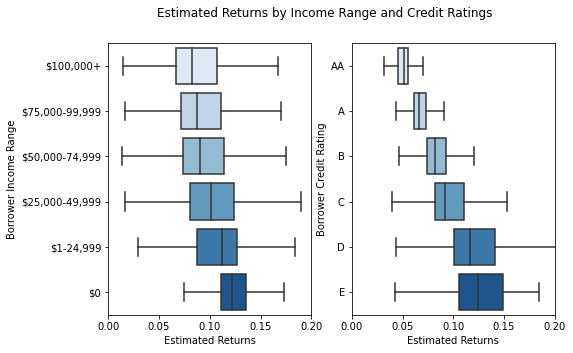

In [29]:
#Boxplots
plt.figure(figsize = [8, 5])

plt.subplot(1, 2, 1)
base_color = sns.color_palette()[0]
sns.boxplot(data = df, y = "IncomeRange", x = "EstimatedReturn", palette = "Blues", showfliers = False)
plt.xlim(0,.2)
plt.ylabel("Borrower Income Range")
plt.xlabel("Estimated Returns")

plt.subplot(1, 2, 2)
base_color = sns.color_palette()[0]
sns.boxplot(data = df, y = "ProsperRatingCombined", x = "EstimatedReturn", palette = "Blues", showfliers = False)
plt.xlim(0,.2)
plt.ylabel("Borrower Credit Rating")
plt.xlabel("Estimated Returns")

plt.suptitle("Estimated Returns by Income Range and Credit Ratings");

From these boxplot, we're able to clearly see that as the borrowers income increases, the median estimated return decreases. 

## Actual Returns

Next let's plot the actual returns.

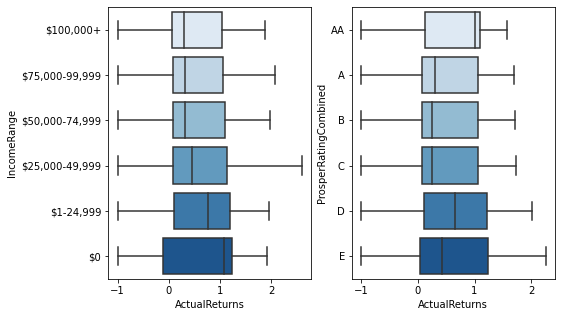

In [30]:
#Boxplots
plt.figure(figsize = [8, 5])

plt.subplot(1, 2, 1)
base_color = sns.color_palette()[0]
sns.boxplot(data = df, y = "IncomeRange", x = "ActualReturns", palette = "Blues", showfliers = False)

plt.subplot(1, 2, 2)
base_color = sns.color_palette()[0]
sns.boxplot(data = df, y = "ProsperRatingCombined", x = "ActualReturns", palette = "Blues", showfliers = False);

This plot is quite interesting as it suggests that investing in borrowers with no reported income and the highest credit ratings will produce the highest returns.

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [32]:
!jupyter nbconvert "Part II_Prosper Loan Exploration.ipynb" --to slides --post serve  --no-input --no-prompt

[NbConvertApp] Converting notebook Part II_Prosper Loan Exploration.ipynb to slides
[NbConvertApp] Writing 662336 bytes to Part II_Prosper Loan Exploration.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\butch\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\butch\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\butch\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\butch\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\butch\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
